In [3]:
import pandas as pd
from prophet import Prophet
from prophet.plot import *

In [4]:
# Read the data into a DataFrame
df = pd.DataFrame({
    'ds': ['2017-06-01', '2017-06-02', '2017-06-03', '2017-06-04', '2017-06-05', '2017-06-06', '2017-06-07',
       '2017-06-08', '2017-06-09', '2017-06-10', '2017-06-11', '2017-06-12', '2017-06-13', '2017-06-14',
        '2017-06-15', '2017-06-16', '2017-06-17', '2017-06-18', '2017-06-19', '2017-06-20', '2017-06-21',
       '2017-06-22', '2017-06-23', '2017-06-24', '2017-06-25', '2017-06-26', '2017-06-27', '2017-06-28', 
       '2017-06-29', '2017-06-30'],
    'y': [508.70588235294116, 502.94117647058823, 410.1764705882353, 328.11764705882354, 498.1764705882353, 490.6470588235294, 495.1764705882353, 504.0, 502.29411764705884, 405.70588235294116, 327.3529411764706, 482.8235294117647, 491.7647058823529, 513.8823529411765, 508.8235294117647, 502.29411764705884, 408.1764705882353, 291.8235294117647, 462.94117647058823, 490.29411764705884, 498.11764705882354, 499.5882352941176, 509.3529411764706, 420.1764705882353, 312.1764705882353, 483.8235294117647, 489.5882352941176, 492.05882352941177, 491.4117647058824, 503.5882352941176]

})

df['ds'] = pd.to_datetime(df['ds'])
df.tail()

,ds,y
25,2017-06-26,483.823529
26,2017-06-27,489.588235
27,2017-06-28,492.058824
28,2017-06-29,491.411765
29,2017-06-30,503.588235


23:42:09 - cmdstanpy - INFO - Chain [1] start processing
23:42:09 - cmdstanpy - INFO - Chain [1] done processing


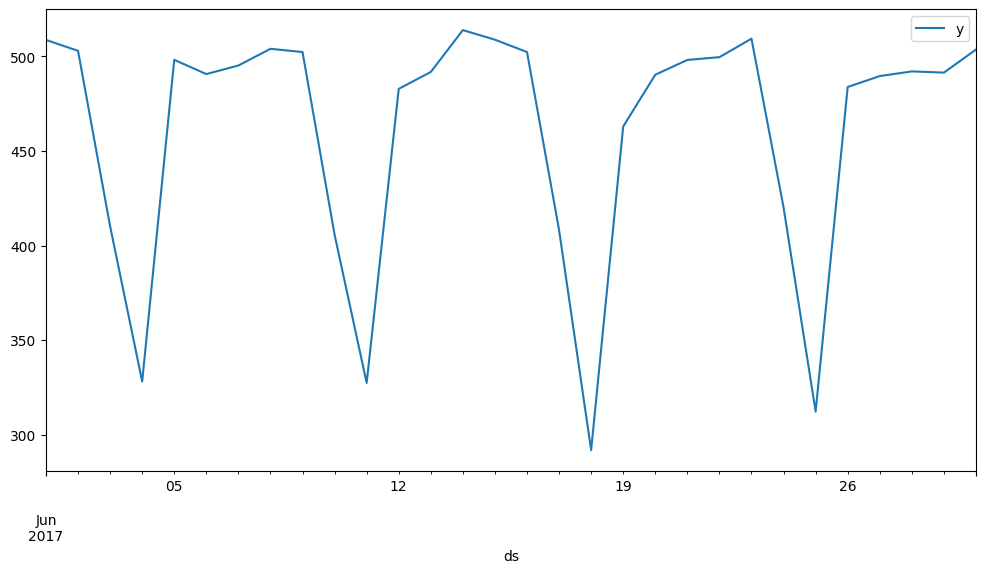

In [5]:
df.plot(x ='ds', y ='y', figsize =(12,6))

train_section=df.iloc[:21]
test_section=df.iloc[21:]

model = Prophet()
model.fit(train_section)
future_value = model.make_future_dataframe(periods=40)
forecast = model.predict(future_value)

In [6]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
56,2017-07-27,448.787688,434.786310,462.333906
57,2017-07-28,443.590580,428.401903,457.798725
58,2017-07-29,348.569746,333.418489,364.221940
59,2017-07-30,255.784315,240.490372,270.868676
60,2017-07-31,420.805799,404.833973,435.604993


In [7]:
plot_plotly(model, forecast)

In [8]:
plot_components_plotly(model, forecast)

In [11]:
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_error

predictions = forecast.iloc[:9]['yhat']
test_data = test_section['y']

rmse_value = rmse(predictions, test_data)
mae_value = mean_absolute_error(predictions, test_data)

print("RMSE =", rmse_value)
print("MAE =", mae_value)
print("Mean =", test_data.mean())

RMSE = 9.525782222580492
MAE = 7.913069105273198
Mean = 466.8627450980392
